### Spotify Hit Songs Combined dataset EDA and model comparison

In [76]:
# Import libraries
import glob
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Get CSV files list from a folder
path = 'D:/Random Datasets/Spotify Hit songs'
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

In [77]:
# Reading the first 5 elements to know more about the dataset

df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [78]:
# Using info method to know the Data-types and shape of the columns present in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [79]:
# Checking for null values

df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [80]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
danceability,41106.0,0.539695,0.177821,0.000000,0.420000,0.552000,0.669000,0.988
energy,41106.0,0.579545,0.252628,0.000251,0.396000,0.601000,0.787000,1.000
key,41106.0,5.213594,3.534977,0.000000,2.000000,5.000000,8.000000,11.000
loudness,41106.0,-10.221525,5.311626,-49.253000,-12.816000,-9.257000,-6.374250,3.744
mode,41106.0,0.693354,0.461107,0.000000,0.000000,1.000000,1.000000,1.000
speechiness,41106.0,0.072960,0.086112,0.000000,0.033700,0.043400,0.069800,0.960
acousticness,41106.0,0.364197,0.338913,0.000000,0.039400,0.258000,0.676000,0.996
instrumentalness,41106.0,0.154416,0.303530,0.000000,0.000000,0.000120,0.061250,1.000
liveness,41106.0,0.201535,0.172959,0.013000,0.094000,0.132000,0.261000,0.999
valence,41106.0,0.542440,0.267329,0.000000,0.330000,0.558000,0.768000,0.996


In [81]:
# Converting the duration from milli-seconds to seconds

df['duration'] = df["duration_ms"].apply(lambda x: round(x/1000))
df.drop("duration_ms", inplace = True, axis=1)

In [82]:
df.duration.head()

0    197
1    243
2    339
3    256
4    194
Name: duration, dtype: int64

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'loudness'),
 Text(3.5, 0, 'speechiness'),
 Text(4.5, 0, 'acousticness'),
 Text(5.5, 0, 'instrumentalness'),
 Text(6.5, 0, 'liveness'),
 Text(7.5, 0, 'valence'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'time_signature'),
 Text(10.5, 0, 'chorus_hit'),
 Text(11.5, 0, 'sections'),
 Text(12.5, 0, 'target'),
 Text(13.5, 0, 'duration')]

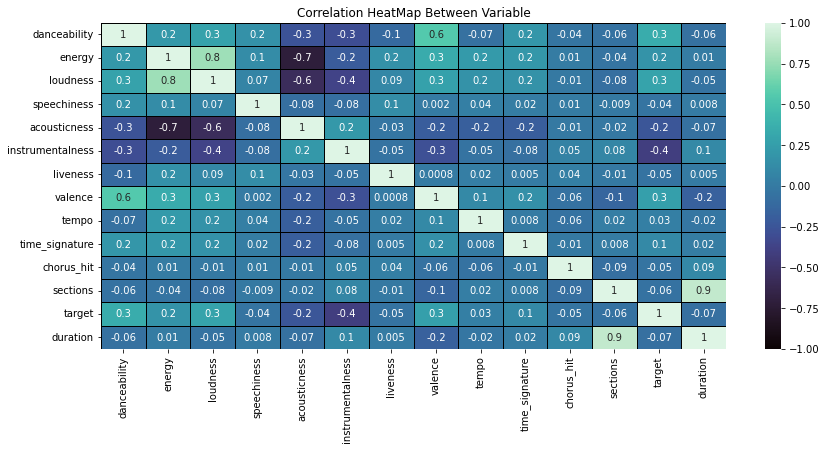

In [83]:
# Heatmap

corr_df = df.drop(['key', 'mode'], axis=1).corr(method = 'pearson') # Dropping 'key' and 'mode' column due to high cardinality
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_df, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='mako', linewidths=1, linecolor='Black')
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

In [84]:
sample_df = df.sample(int(0.004*len(df))) # Creating a sample df from our original df by using on 1/4th of the original dataset 

print(len(df))
print(len(sample_df))

41106
164


[Text(0.5, 1.0, 'Loudness VS Energy Correlation')]

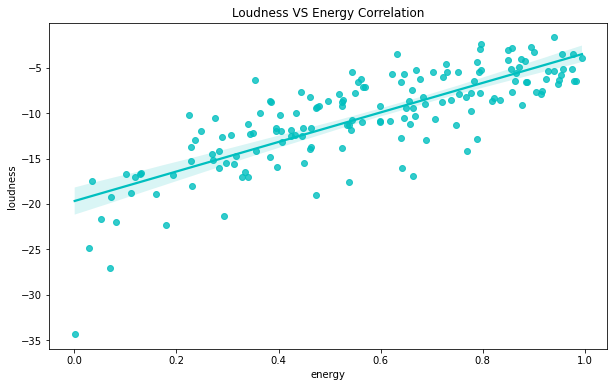

In [85]:
# Plotting a regression plot

plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = 'loudness', x = 'energy', color = 'c').set(title = 'Loudness VS Energy Correlation')

[Text(0.5, 1.0, 'Popularity VS Acousticness Correlation')]

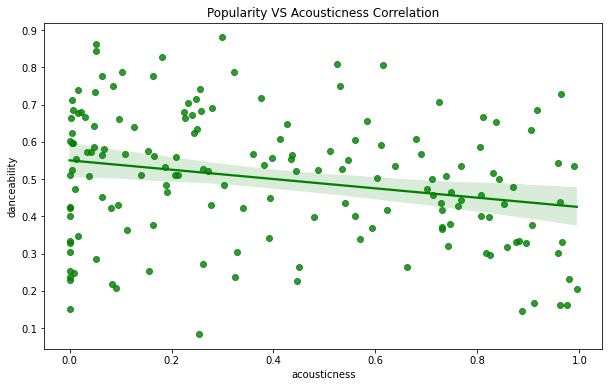

In [86]:
plt.figure(figsize=(10,6))
sns.regplot(data = sample_df, y = 'danceability', x = 'acousticness', color = 'g').set(title = 'Popularity VS Acousticness Correlation')

In [87]:
# Preprocessing for modelling

def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['track', 'artist', 'uri'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [88]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [89]:
X_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,duration
17085,-0.550518,0.150359,-1.197764,-0.362594,0.664137,0.141920,1.202147,-0.508907,1.555762,0.345401,-1.392069,0.251646,1.106731,-0.724572,-0.305840
5559,0.844692,-0.186046,-1.481135,0.090613,0.664137,-0.447313,-0.610530,-0.508719,-0.463233,-0.542666,0.015541,0.251646,-0.128543,0.935317,0.712288
32888,-0.477086,-1.373357,0.785835,-0.452973,0.664137,-0.549026,0.205618,-0.508705,-0.851991,-0.448988,-1.521263,0.251646,0.259150,0.105373,0.160802
14170,-0.245492,-1.887858,1.635949,-1.823493,-1.505714,0.219082,1.829044,-0.508120,2.834266,-0.741263,-0.360881,2.610233,-0.036559,-0.517086,-0.399169
7958,-2.081294,1.329754,-1.481135,1.194695,0.664137,0.754535,-1.056543,-0.508912,0.578082,-0.816206,1.395059,0.251646,-0.803074,0.312859,0.788647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,2.194713,-0.953840,-1.197764,-0.123589,0.664137,3.490260,-0.964490,-0.508852,-0.081418,-1.014803,-0.703512,0.251646,-0.965089,0.520345,-0.271903
32511,0.471883,-0.000034,-0.914393,0.245064,0.664137,-0.516290,-0.400578,-0.508917,-0.434308,-0.310345,-0.622327,0.251646,-0.694980,-1.139544,-0.407653
5192,0.511423,0.692564,0.502464,0.566932,0.664137,0.742844,-1.053113,-0.508917,-0.648935,-0.392781,-0.964785,0.251646,-0.883889,0.727831,0.186255
12172,0.099074,0.941899,0.785835,1.156177,0.664137,-0.375997,-0.864837,-0.508917,0.051639,-0.340322,-1.320019,0.251646,-1.043435,-0.724572,-0.424622


In [90]:
y_train

17085    1
5559     0
32888    1
14170    0
7958     0
        ..
7813     1
32511    1
5192     1
12172    1
33003    1
Name: target, Length: 28774, dtype: int64

In [91]:
# Training 

models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [92]:
# Results

for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 72.45%
                   K-Nearest Neighbors: 72.90%
                         Decision Tree: 70.28%
                         Random Forest: 78.17%
                     Gradient Boosting: 77.77%
